In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# VISUALIZACIONES

## MAESTROS

In [87]:
ma = pd.read_csv("maestro limpieza.csv")
ma

,Unnamed: 0,capital,latitud_dec,altitud,num_hab,zona_comarcal,longitud_dec
0,0,Ababuj,40.548459,1372.0,65,624401,-0.807801
1,1,Abades,40.916340,971.0,873,674001,-4.267874
2,2,Abadiño-Zelaieta,43.147646,144.0,7504,754802,-2.606873
3,3,Abadía,40.259532,451.0,324,701001,-5.977858
4,4,Abadín o Provecende,43.363021,515.0,2646,712702,-7.472145
...,...,...,...,...,...,...,...
8117,8117,Òrrius,41.555186,255.0,690,690804,2.354940
8118,8118,Ólvega,41.780457,1030.0,3814,674201,-1.982666
8119,8119,Órgiva,36.901199,455.0,5393,611803,-3.423911
8120,8120,Úbeda,38.011498,750.0,35177,612303,-3.371192


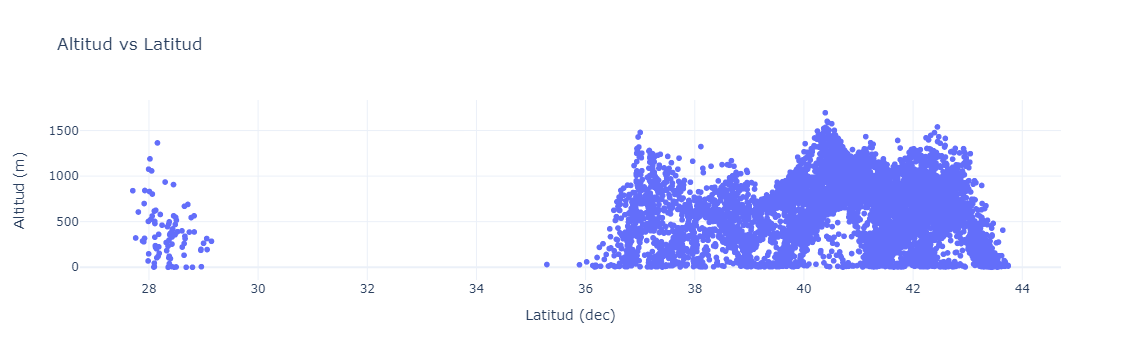

In [89]:
fig = px.scatter(ma, x='latitud_dec', y='altitud', hover_name='capital', title='Altitud vs Latitud')

# Etiquetas de los ejes
fig.update_layout(
    xaxis_title='Latitud (dec)',
    yaxis_title='Altitud (m)',
    template='plotly_white'
)

# Mostrar la gráfica
fig.show()

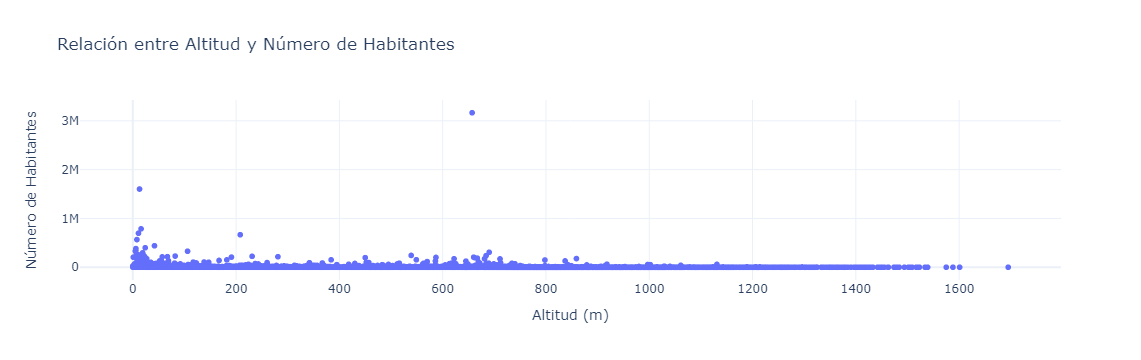

In [98]:
fig = px.scatter(ma, x='altitud', y='num_hab', title='Relación entre Altitud y Número de Habitantes',
                 labels={'altitud': 'Altitud (m)', 'num_hab': 'Número de Habitantes'},
                 hover_name='capital')

# Ajustar el diseño
fig.update_layout(
    xaxis_title='Altitud (m)',
    yaxis_title='Número de Habitantes',
    template='plotly_white'
)

# Mostrar la gráfica
fig.show()

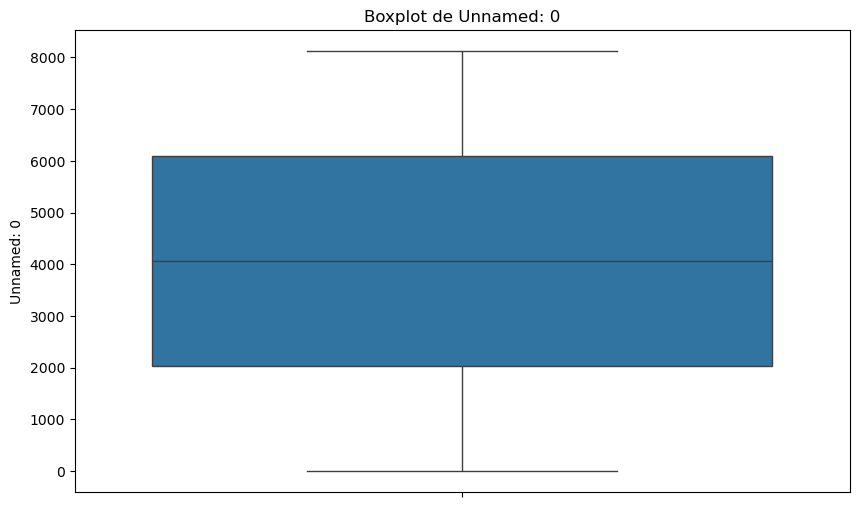

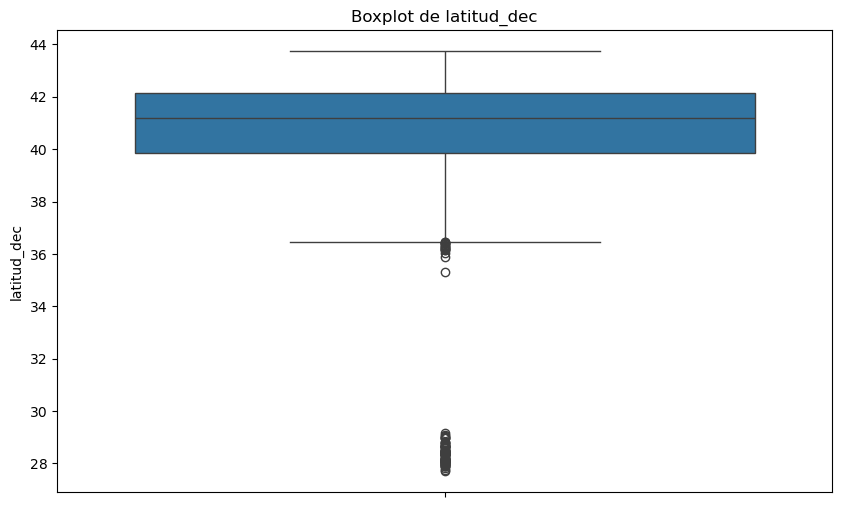

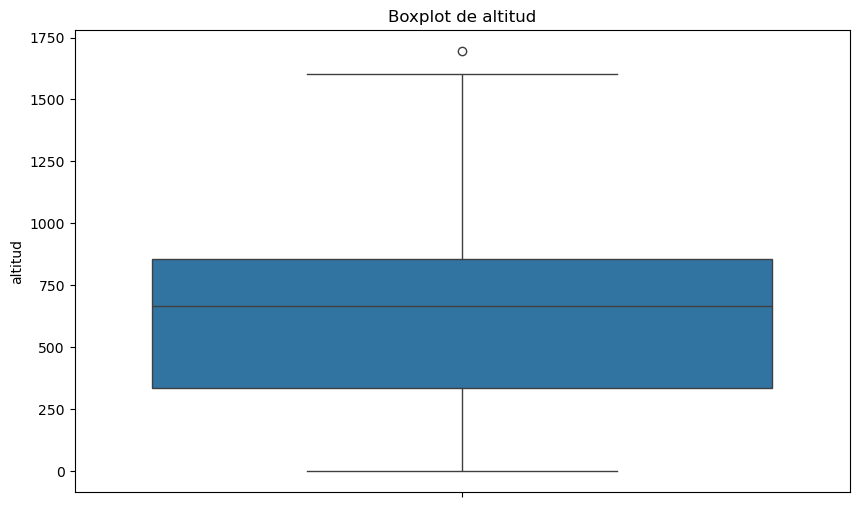

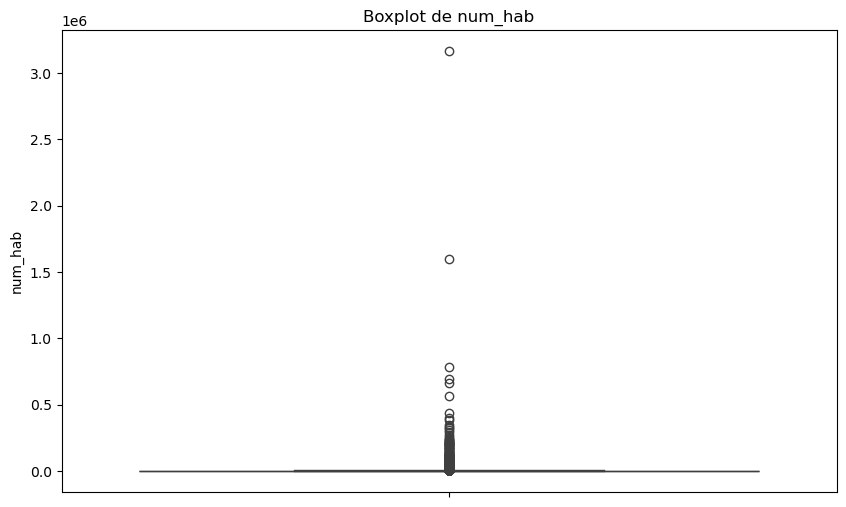

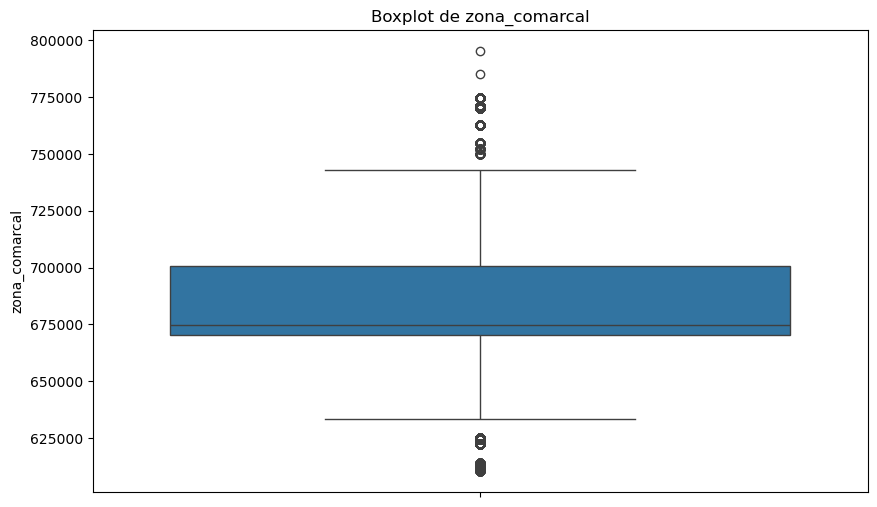

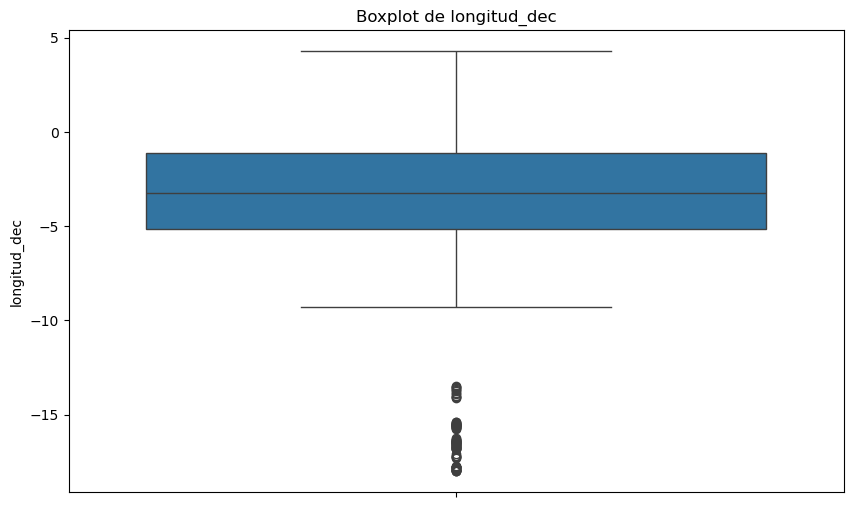

In [111]:
numerical_columns = ma.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots para cada columna numérica
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=ma[column])  # Usamos y para mostrar la distribución de cada variable
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)
    plt.show()

## VALORES CLIMATOLÓGICOS

In [129]:
va = pd.read_csv("valores_climatologicos_limpio_2022.csv")
va.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159129 entries, 0 to 159128
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  159129 non-null  int64  
 1   fecha       159129 non-null  object 
 2   indicativo  159129 non-null  object 
 3   nombre      159129 non-null  object 
 4   provincia   159129 non-null  object 
 5   altitud     159129 non-null  int64  
 6   tmed        156098 non-null  object 
 7   prec        152900 non-null  object 
 8   tmin        156124 non-null  object 
 9   horatmin    155367 non-null  object 
 10  tmax        156137 non-null  object 
 11  horatmax    155464 non-null  object 
 12  dir         127213 non-null  float64
 13  velmedia    127682 non-null  object 
 14  racha       127213 non-null  object 
 15  horaracha   127171 non-null  object 
 16  hrMedia     149263 non-null  float64
 17  hrMax       151799 non-null  float64
 18  horaHrMax   151775 non-null  object 
 19  hr

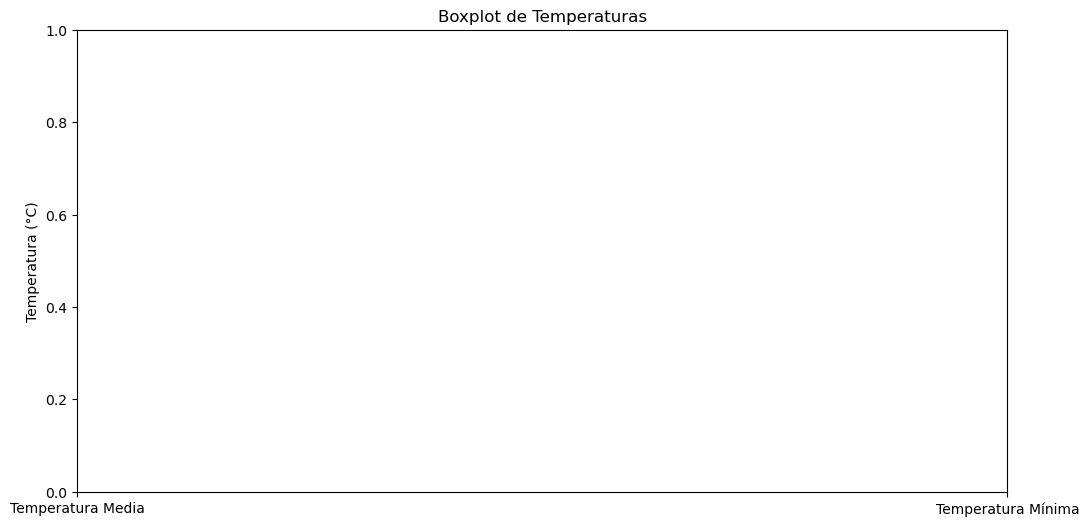

In [131]:
# 1. Boxplot para temperaturas
plt.figure(figsize=(12, 6))
sns.boxplot(data=va[['tmed', 'tmin']])
plt.title('Boxplot de Temperaturas')
plt.ylabel('Temperatura (°C)')
plt.xticks(ticks=[0, 1], labels=['Temperatura Media', 'Temperatura Mínima'])
plt.show()



TypeError: can't multiply sequence by non-int of type 'float'

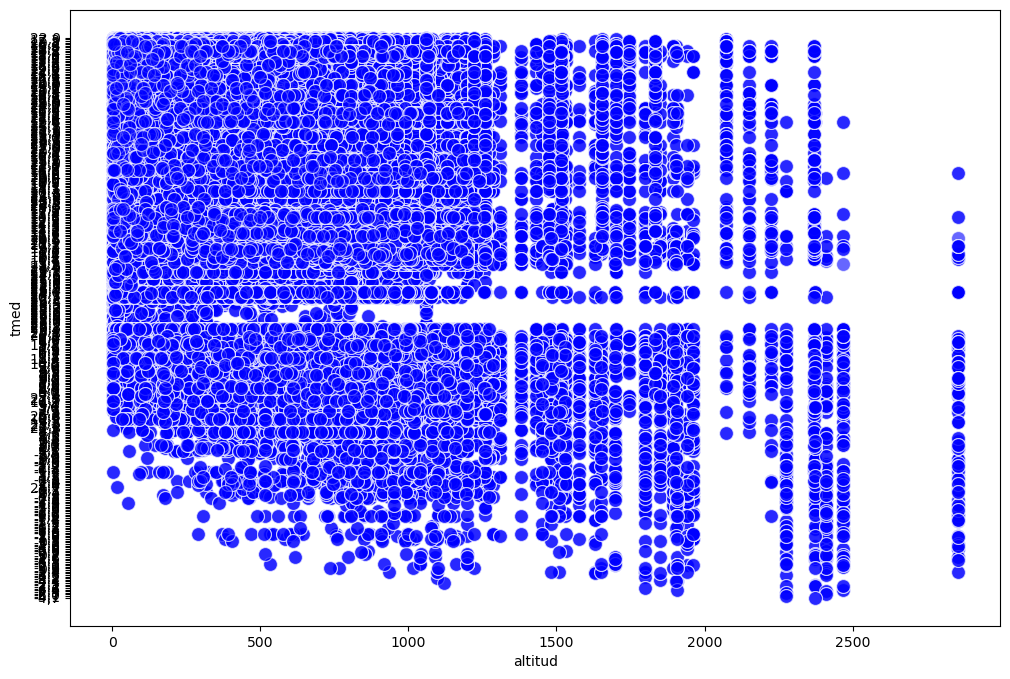

In [135]:
# 2. Gráfico de dispersión entre altitud y temperatura media
plt.figure(figsize=(12, 8))
sns.scatterplot(x='altitud', y='tmed', data=va, color='blue', alpha=0.6, s=100)
sns.regplot(x='altitud', y='tmed', data=va, scatter=False, color='red')
plt.title('Relación entre Altitud y Temperatura Media', fontsize=16)
plt.xlabel('Altitud (m)', fontsize=14)
plt.ylabel('Temperatura Media (°C)', fontsize=14)
plt.show()



In [ ]:
# 3. Histograma de precipitaciones
plt.figure(figsize=(10, 6))
sns.histplot(va['prec'], bins=30, kde=True)
plt.title('Histograma de Precipitaciones')
plt.xlabel('Precipitaciones (mm)')
plt.ylabel('Frecuencia')
plt.show()